# Handling with Missing Values

Missing Values:
    Missing data yaygın bir konudur. Missing data ile mücadele etmek de anynı şekilde. 
    Missing Value nun NaN halde olmasını isteriz. 
    NaN : Not a Number
    
    Missing Value oluşma nedenleri:
        - Eğer dataları manuel olarak giriyorsak
        - Ekipman hatası olabilir
        - yanlış ölçümlemeden kaynaklı olabilir
        -

Missing Value Tipleri:
    
    * Missing completely at random (MCAR)
    * Missing at random (MAR)
    * Missing not at random (MNAR)
    * Structurally missing
    

MCAR :

    - Random olarak oluşturulduğu için Geri kalan değerlerden , değişkenlerden tahmin edilemezler 

MAR:

    - Datanın doğru bir şekilde kaydedilmemesi ile oluşturulan hatalar
    - Missing value nun olduğu kısmın altındaki ve üstündeki yerlere bakarak uygun bir değer ataması yapılabilir.

MNAR: 

    - Neden bir missing değer oldupunu biliriz ama bir değer atayamayız . Örneğin : bir ankette sorulara cevap vermeyen bir aday 
        
Structurally :

    - Yapısal olan bir missing değer. 
    

How Can you handle with Missing Values:
    
    - droppig
    - removing 
    - keeping
    - göz ardı edebiliriz
    - ortalama veya ortanca değerle doldurabiliriz

    Not: Missing value'ları NaN şekilde bırakamayız. 


Remove the missing data instances  : 
    
    Bu metod çok fazla data varsa ve missing value'lar da az ise kabul edilebilir

Imputation methods: 
    
    Çoğu modelde kullanılır. 
    Nereyi nasıl doldurmalıyırz, nasıl bir yöntemle doldurmalıyız ?
    
Keep the missing values and use a model which incorporotes (içerir) them. 
    
    Missing value 'ları modelde tutarak devam ediyorz. 
    (Bu yöntem çok kullanılmaz )'

En fazla kullanılan methodlardan olan "imputation methods" :
    
    Continuous Variable         Categorical Variable       Other Methods         Prediction of Missing    Using DL
        - mean                     - mode                   - ffill                   Values              (Datawig)
        - median                                            - bfill
        - model                                             - interpolate

Some Usefull Methods:
        
        isnull()          any()             interpolate()
        isna ()           all()
        notnull()         fillna() 
        notna()           where()
        drop()            map()
        dropna()          replace()

df.unique() : Return unique values of Series object

df.dropna() : Return object with labels on given axis omited where alternately any all of the data are missing
    
df.apply() : apply a function along an axis of the DataFrame
    
df.fillna() : Used for imputing in a missng data
    
df.sort_values() : Sort by the values along either axis
    
df.value_counts(): Count distinct observations over requested axis
    


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


# Type of NaN Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [4]:
type(np.nan)

float

In [5]:
type(np.NaN)

float

In [6]:
type(None)

NoneType

In [7]:
print(0* np.nan)
print(np.nan - np.nan)
print(np.nan + np.nan)
print(np.nan - 10)
print(np.nan + 10)
print(np.nan == np.nan)
print(10 > np.nan)
print(np.inf > np.nan)
print(np.nan is np.nan)
print(0.3 == 3*0.1)

nan
nan
nan
nan
nan
False
False
False
True
False


In [8]:
df.salary

0      NaN
1       54
2       59
3      120
4       58
5       75
6     None
7      136
8       60
9      125
10     NaN
Name: salary, dtype: object

In [10]:
type(df.salary[0])

float

In [11]:
type(df.salary[6])

NoneType

In [12]:
type(df.salary[1])

int

In [13]:
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [14]:
type(df.status[2])

str

In [16]:
type(df.status[10])

float

In [17]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [18]:
type(df.var1[0])

str

In [19]:
type(df.var1[3])

str

In [20]:
type(df.var1[10])

str

The None keyword is used to define a null variable or an object. 

In Python, None keyword is an object, and it is a data type of the class NoneType.

We can assign None to any variable, but you can not create other NoneType objects.

Note: All variables that are assigned None point to the same object. New instances of None are not created.

    None is not the same as False.
    None is not 0.
    None is not an empty string.
    Comparing None to anything will always return False except None itself.

In [22]:
#Örneğin : 

var=None

if var is None:
    print("None")
else:
    print("Not none")
        
    

None


In [23]:
if var == None:
    print("None")
else:
    print("Not none")
    

None


In [24]:
typeOfNone = type(None)

print(typeOfNone)

<class 'NoneType'>


 None in olması gereken değer Float

# Detecting Missing Values

In [25]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [28]:
df.isnull()

#df.isna()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [29]:
df.notnull()

#df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [31]:
df.isnull().any()

#sütunlarda hiç null değer var mı?

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [32]:
df.isnull().any(axis=1)

#axis verdik ve bu sayede sütunlar boyunca bakar

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [34]:
df.isnull().sum()

#null değerden kaçç tane var

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [35]:
df.isnull().sum().sum()

#tüm df de kaç tane null değr olduğunu gösterir

9

In [36]:
df.salary.isnull()

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: salary, dtype: bool

In [37]:
df.salary.isnull().sum()

3

In [38]:
df.isnull().sum()/len(df)*100

#sütunda % kaç oranında none value var

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [40]:
df[df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [50]:
df.loc[df.status.isnull(),("gender","salary")]

,gender,salary
10,M,NaN


In [45]:
df.loc[df.dept.isnull(),"salary"]

# 5 ve 8. indexte year alan dept verileri none derde ve salaryleri 75 60

5    75
8    60
Name: salary, dtype: object

In [63]:
df.loc[df.dept.isnull()]

,id,gender,status,dept,var1,var2,salary
5,P006,F,PT,None,1,NaN,75
8,P009,M,PT,NaN,14,3.0,60


In [62]:
df[~df.isnull().any(axis=1)]

# 

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


# Converting Inappropriate Values to NaN Values

map()

replace ()

In [64]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


df deki "-" ler yerine atamlar yapmak isterse:
    
    

In [67]:
df["var1"].map({"-":np.nan})

#belirtmediğimiz tüm yerlere nan ataması yapar. Amaç var1 sütunundaki "-" yyerine nan ataması yapmaktı ancak konumunu
#belitmediğimiz için tüm sütuna nan ataması yaptı

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

In [69]:
df["var1"].replace(to_replace="-", value=np.nan)

# bu şekilde dtype ı değiştiremedik. Tüm sütunda sayı olmasına rağmen object görünmeye devam ediyor. Çünkü Nan datalar var

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [70]:
df["var1"].replace(to_replace="-",value=np.nan).astype("float")

#data tipini değiştimek için astype komutunu eklememiz gerekir.

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [72]:
# df.var1 olarak object olarak görünmeye devam edecek. Bunun olamması için df["var1"] 'e atamasını yapmamaız gerek'

In [73]:
df["var1"]=df["var1"].replace(to_replace="-",value=np.nan).astype("float")

In [74]:
df.var1

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [75]:
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [76]:
df["status"]=df["status"].replace(to_replace="-",value=np.nan)

In [77]:
df.status

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [78]:
df

#"-" lerden kurtulduk 

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [82]:
#df["gender"].map({"M":1,"F":0})

#df["gender"].replace({"M":1,"F":0})

df["gender"].replace(["M","F"],[1,0])

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
Name: gender, dtype: int64

In [83]:
df.gender

0     M
1     F
2     M
3     F
4     M
5     F
6     M
7     F
8     M
9     F
10    M
Name: gender, dtype: object

# Missing Value Handling Methods

**Deleting (Dropping) Rows : -----> if it has more than 70 - 75 % of missing values
    
**Replacing (Filling) With Mean/Mode (Imputation) ---> can be applied on a feature which has numeric data

**Assigning An Unique Category ---> If a categorical feature has definite number of classes , we can ass,gn another class

**Predicting The Missing Values ---> We can predict the nulls with the help of machine learning algorithm like linear regression

**Using Algorithm Which Support Missing Values  ---> KNN (K-En Yakın Komşu Algoritması) is a machine learning algorithm which works on the principle of distance measure. This algorithm can be used when there are nulls present in the dataset. KNN considers the missing values by taking the majority of the K nearest values

# 1 - Dropping

**dropna()

**drop()

In [84]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [86]:
df.dropna(axis=0, how="any", thresh=None, inplace=False)

#herhangi bir (en az bir eksik değer) missing value içeren satırları kaldırır


,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [88]:
df.dropna(axis=1, how="any", thresh=None, inplace=False)

#herhangi bir (en az bir eksik değer) missing value içeren sütunları kaldırır

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [89]:
df.dropna(axis=1 , how="all" , thresh=None , inplace=False )

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**any** : Herhangi bir NA değeri varsa, o satırı veya sütunu bırakın.

**all** : Tüm değerler NA ise, o satırı veya sütunu bırakın

In [90]:
df["delete_me"]=np.nan
df

#eksik değerlerle dolu bir sütun oluşturalım

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


In [91]:
df.dropna(axis=1 , how="all", inplace=True)
df

#şimdi tam eksik değer içeren sütunu drop edelim

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [108]:
df.dropna(axis=1 , how="any" , thresh=9 , inplace=False)

#Yalnızca en az 9 NA olmayan değere sahip sütunları tutun.

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


In [109]:
df.drop(columns=["id","var1"])

,gender,status,dept,var2,salary
0,M,FT,DS,8.0,NaN
1,F,PT,FS,NaN,54
2,M,NaN,AWS,5.0,59
3,F,FT,AWS,8.0,120
4,M,PT,DS,11.0,58
5,F,PT,None,NaN,75
6,M,FT,FS,NaN,None
7,F,NaN,FS,2.0,136
8,M,PT,NaN,3.0,60
9,F,FT,DS,7.0,125


In [101]:
df.drop([1,3,5])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59
4,P005,M,PT,DS,7.0,11.0,58
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [105]:
df.drop(["var1","var2"], axis=1)

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


In [103]:
df.drop(columns=["id","var1"])

,gender,status,dept,var2,salary
0,M,FT,DS,8.0,NaN
1,F,PT,FS,NaN,54
2,M,NaN,AWS,5.0,59
3,F,FT,AWS,8.0,120
4,M,PT,DS,11.0,58
5,F,PT,None,NaN,75
6,M,FT,FS,NaN,None
7,F,NaN,FS,2.0,136
8,M,PT,NaN,3.0,60
9,F,FT,DS,7.0,125


# 2 - Filling Missing Values (Imputation)

**fillna()**

**where()**

**interpolate()**

In [110]:
df


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [112]:
df.fillna(0)

#Nan olan yerler için 

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


In [113]:
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [115]:
df["var1"].fillna(0)

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

In [116]:
df["var2"]

0      8.0
1      NaN
2      5.0
3      8.0
4     11.0
5      NaN
6      NaN
7      2.0
8      3.0
9      7.0
10     9.0
Name: var2, dtype: float64

In [117]:
df["var2"].fillna("boş")

0      8.0
1      boş
2      5.0
3      8.0
4     11.0
5      boş
6      boş
7      2.0
8      3.0
9      7.0
10     9.0
Name: var2, dtype: object

# b.Filling with any Proper Value

In [118]:
df["var1"].mean()

6.0

In [119]:
df["var1"].fillna(df["var1"].mean())

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [121]:
df["var1"].median()

5.5

In [122]:
df["var1"].fillna(df["var1"].median())

0      2.0
1      3.0
2      5.0
3      5.5
4      7.0
5      1.0
6      5.5
7     10.0
8     14.0
9      5.5
10     6.0
Name: var1, dtype: float64

In [123]:
df["var2"].median()

7.5

In [124]:
df["var2"].fillna(df["var2"].median())

0      8.0
1      7.5
2      5.0
3      8.0
4     11.0
5      7.5
6      7.5
7      2.0
8      3.0
9      7.0
10     9.0
Name: var2, dtype: float64

In [125]:
df.mean()

var1       6.000
var2       6.625
salary    85.875
dtype: float64

In [126]:
df.fillna(df.mean())

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,None,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [128]:
df.fillna({"dept":"other","var1":df.var1.mean(), "var2":df.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,other,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,other,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


In [129]:
df.mean()[["var1","var2"]]

var1    6.000
var2    6.625
dtype: float64

In [130]:
df.fillna(df.mean()[["var1","var2"]])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,NaN
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,None,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,None
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125



**where() Replace values where the condition is False.**

In [131]:
df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [132]:
df.where(cond=df.notna(), other=df.mean(), axis=1)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,NaN,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


In [133]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Fill NaN values using an interpolation method**

In [134]:
df.interpolate()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,8.0,75
6,P007,M,FT,FS,5.5,5.0,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,10.0,7.0,125


**c.Filling the Missing Values of Categorical Variables**

In [135]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [136]:
df["dept"].mode()

0    AWS
1     DS
2     FS
dtype: object

In [137]:
df["dept"].mode()[0]

'AWS'

In [138]:
df["dept"].fillna(df["dept"].mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [139]:
df["dept"].fillna(method="bfill")

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [140]:
df["status"].fillna(method="ffill")

0     FT
1     PT
2     PT
3     FT
4     PT
5     PT
6     FT
7     FT
8     PT
9     FT
10    FT
Name: status, dtype: object

**pad / ffill:** propagate last valid observation forward to next valid

**backfill / bfill:** use next valid observation to fill gap.

In [141]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [142]:
df["dept"].fillna(method="ffill" , inplace=True)

In [143]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Let's fill the missing values at "status" column with defined condition by "salary"**

In [145]:
df.loc[df["salary"] >= 100 , "status"]

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [146]:
df.loc[df["salary"] < 100 , "status"]

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [149]:
df.loc[df["salary"] >=100 , "status"].fillna(df.loc[df["salary"] >=100 ,"status"].mode()[0] , inplace=True)
df.loc[df["salary"] < 100 , "status"].fillna(df.loc[df["salary"] < 100 , "status"].mode() , inplace=True)

df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [150]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,PT,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Let's fill the last missing value at "status" column with the mode of the group of "gender" and "dept"**

In [151]:
df.groupby(["gender", "dept"])["status"].apply(lambda x : x.mode()[0])

gender  dept
F       AWS     FT
        DS      FT
        FS      FT
M       AWS     PT
        DS      FT
        FS      FT
Name: status, dtype: object

In [152]:
df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0])

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [153]:
df["trans_status"] = df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0])
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54,FT
2,P003,M,PT,AWS,5.0,5.0,59,PT
3,P004,F,FT,AWS,NaN,8.0,120,FT
4,P005,M,PT,DS,7.0,11.0,58,FT
5,P006,F,PT,DS,1.0,NaN,75,FT
6,P007,M,FT,FS,NaN,NaN,None,FT
7,P008,F,FT,FS,10.0,2.0,136,FT
8,P009,M,PT,FS,14.0,3.0,60,FT
9,P010,F,FT,DS,NaN,7.0,125,FT


**Let's fill the missing values at "salary" column with the mean of the group of "status" and "dept"**

In [172]:
# regarding to avg of "salary" in terms of "department"

df.groupby("dept")["salary"].sum()

dept
AWS    179
DS     258
FS     250
Name: salary, dtype: int64

In [174]:
df.groupby(["status","dept"])["salary"].sum()

status  dept
FT      AWS     120
        DS      125
        FS      136
PT      AWS      59
        DS      133
        FS      114
Name: salary, dtype: int64

In [177]:
df.groupby(["status","dept"])["salary"].transform("sum")

0     125
1     114
2      59
3     120
4     133
5     133
6     136
7     136
8     114
9     125
10     59
Name: salary, dtype: int64

In [178]:
df["trans_salary"] = df.groupby(["status","dept"])["salary"].transform("sum")
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,NaN,FT,125
1,P002,F,PT,FS,3.0,NaN,54,FT,114
2,P003,M,PT,AWS,5.0,5.0,59,PT,59
3,P004,F,FT,AWS,NaN,8.0,120,FT,120
4,P005,M,PT,DS,7.0,11.0,58,FT,133
5,P006,F,PT,DS,1.0,NaN,75,FT,133
6,P007,M,FT,FS,NaN,NaN,None,FT,136
7,P008,F,FT,FS,10.0,2.0,136,FT,136
8,P009,M,PT,FS,14.0,3.0,60,FT,114
9,P010,F,FT,DS,NaN,7.0,125,FT,125


In [179]:
df["salary"].fillna(df.groupby(["status", "dept"])["salary"].transform("sum"), inplace=True)
#df["salary"].fillna(df["trans_salary"], inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125,FT,125
1,P002,F,PT,FS,3.0,NaN,54,FT,114
2,P003,M,PT,AWS,5.0,5.0,59,PT,59
3,P004,F,FT,AWS,NaN,8.0,120,FT,120
4,P005,M,PT,DS,7.0,11.0,58,FT,133
5,P006,F,PT,DS,1.0,NaN,75,FT,133
6,P007,M,FT,FS,NaN,NaN,136,FT,136
7,P008,F,FT,FS,10.0,2.0,136,FT,136
8,P009,M,PT,FS,14.0,3.0,60,FT,114
9,P010,F,FT,DS,NaN,7.0,125,FT,125


**Let's fill the missing values at "var1" column with the mean of the group of "gender" and "status"**

In [180]:
df.groupby(["gender", "status"])["var1"].sum()

gender  status
F       FT        10.0
        PT         4.0
M       FT         2.0
        PT        32.0
Name: var1, dtype: float64

In [181]:
df.groupby(["gender","status"])["var1"].transform("sum")

0      2.0
1      4.0
2     32.0
3     10.0
4     32.0
5      4.0
6      2.0
7     10.0
8     32.0
9     10.0
10    32.0
Name: var1, dtype: float64

In [182]:
trans_var1 = df.groupby(["gender", "status"])["var1"].transform("sum")

In [183]:
df["var1"].fillna(trans_var1, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125,FT,125
1,P002,F,PT,FS,3.0,NaN,54,FT,114
2,P003,M,PT,AWS,5.0,5.0,59,PT,59
3,P004,F,FT,AWS,10.0,8.0,120,FT,120
4,P005,M,PT,DS,7.0,11.0,58,FT,133
5,P006,F,PT,DS,1.0,NaN,75,FT,133
6,P007,M,FT,FS,2.0,NaN,136,FT,136
7,P008,F,FT,FS,10.0,2.0,136,FT,136
8,P009,M,PT,FS,14.0,3.0,60,FT,114
9,P010,F,FT,DS,10.0,7.0,125,FT,125


In [184]:
df["var2"]

0      8.0
1      NaN
2      5.0
3      8.0
4     11.0
5      NaN
6      NaN
7      2.0
8      3.0
9      7.0
10     9.0
Name: var2, dtype: float64

In [185]:
df.groupby(["status"])["var2"].sum()

status
FT    25.0
PT    28.0
Name: var2, dtype: float64

In [186]:
trans_var2 = df.groupby(["status"])["var2"].transform("sum")
trans_var2

0     25.0
1     28.0
2     28.0
3     25.0
4     28.0
5     28.0
6     25.0
7     25.0
8     28.0
9     25.0
10    28.0
Name: var2, dtype: float64

In [187]:
df["var2"].fillna(trans_var2, inplace = True)

In [188]:
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125,FT,125
1,P002,F,PT,FS,3.0,28.0,54,FT,114
2,P003,M,PT,AWS,5.0,5.0,59,PT,59
3,P004,F,FT,AWS,10.0,8.0,120,FT,120
4,P005,M,PT,DS,7.0,11.0,58,FT,133
5,P006,F,PT,DS,1.0,28.0,75,FT,133
6,P007,M,FT,FS,2.0,25.0,136,FT,136
7,P008,F,FT,FS,10.0,2.0,136,FT,136
8,P009,M,PT,FS,14.0,3.0,60,FT,114
9,P010,F,FT,DS,10.0,7.0,125,FT,125


# e.Filling with Interpolation

Pandas **dataframe.interpolate()** function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. 

In [189]:
flights = sns.load_dataset("flights")

In [190]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [191]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

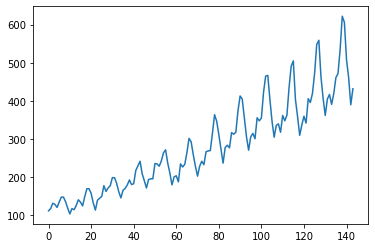

In [192]:
# you don't need to know how this plotting happens.
# just focus on the time-series line

flights.passengers.plot();

In [193]:
flights_copy = flights.copy()

In [194]:
flights_copy.loc[np.random.randint(1, 144, 20),"passengers"] = None

In [195]:
flights_copy.isnull().sum()

year           0
month          0
passengers    19
dtype: int64

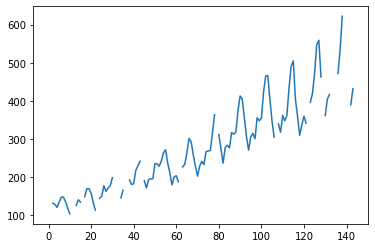

In [196]:
flights_copy.passengers.plot();

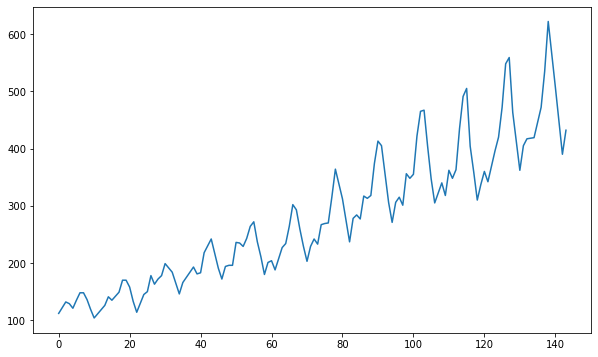

In [198]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))

flights_copy["passengers"].interpolate().plot(kind="line");

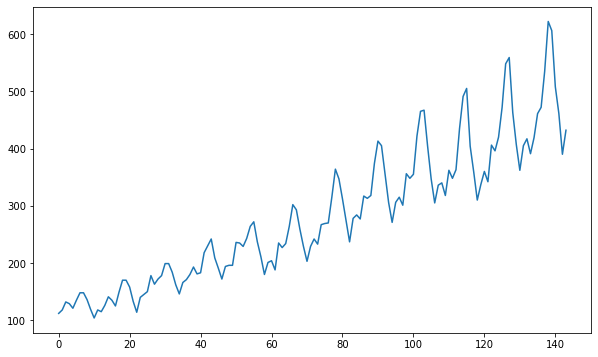

In [199]:
plt.figure(figsize = (10, 6))

flights.passengers.plot();

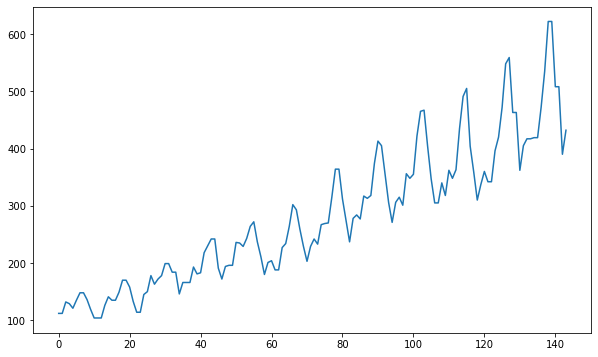

In [200]:
plt.figure(figsize = (10, 6))

flights_copy["passengers"].fillna(method = "ffill").plot(kind="line");